# Rainfall Prediction - Weather Forecasting

Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:

1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".



# Importing some required library

In [1]:
## import all necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df=pd.read_csv('weatherAUS.csv')

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df.shape   ## to check how many rows and columns in a data set

(8425, 23)

Observation : In this data set there are 8425 rows and 23 columns.

In [5]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [6]:
# In this data set there are some categorical featurs and some are continuous features.

In [7]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

# Checking null values 

In [9]:
df.isnull()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
8421,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
8422,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
8423,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<AxesSubplot:>

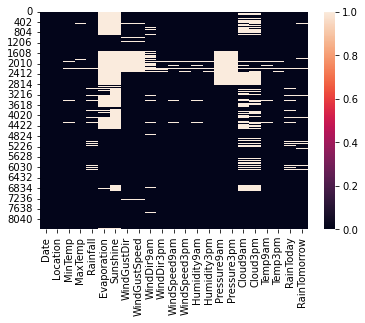

In [11]:
sns.heatmap(df.isnull())

Observation: from above heatmap, it can be seen that there are some null values in this dataset and it can be dropped out from this dataset.

In [12]:
## Dropped some unnessary columns for this data set.
df = df.drop(["Evaporation","Sunshine","Cloud9am","Cloud3pm","Location", "Date"], axis =1)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [27]:
## Removing null values
df = df.dropna(axis = 0)
df.shape

(6332, 17)

<AxesSubplot:>

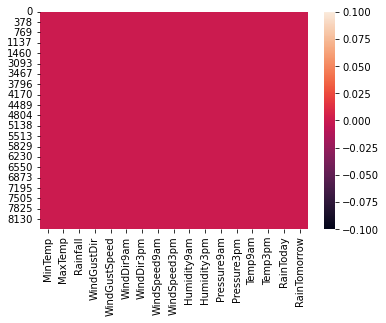

In [14]:
sns.heatmap(df.isnull())

In [ ]:
# Observation : No null values now

# Stastical summary

In [15]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000
mean,13.536592,24.057770,2.784397,41.287903,15.897979,20.000316,66.111655,50.965414,1017.541693,1015.146920,18.174179,22.605212
std,5.305000,6.221539,9.539455,14.291072,9.464313,8.934660,16.727300,18.616937,6.783294,6.710036,5.575869,6.052499
min,-1.300000,8.200000,0.000000,11.000000,2.000000,2.000000,10.000000,6.000000,989.800000,982.900000,1.900000,7.300000
25%,9.600000,19.500000,0.000000,31.000000,9.000000,13.000000,55.000000,38.000000,1013.000000,1010.400000,14.100000,18.300000
50%,13.600000,23.500000,0.000000,39.000000,13.000000,19.000000,66.000000,51.000000,1017.500000,1015.300000,18.100000,22.100000
75%,17.600000,28.200000,1.000000,50.000000,20.000000,26.000000,78.000000,63.000000,1022.100000,1019.700000,22.300000,26.600000
max,28.500000,45.500000,225.000000,107.000000,61.000000,61.000000,100.000000,99.000000,1039.000000,1036.000000,39.400000,43.900000


Observation : There is large gap can be seen in Rainfall attributes between 75% and max value so outliers are present.

# Correlation

In [16]:
dfcor=df.corr() 

In [17]:
dfcor

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.720152,0.081437,0.183754,0.079493,0.143644,-0.103033,0.069361,-0.446465,-0.441899,0.878485,0.689874
MaxTemp,0.720152,1.000000,-0.109937,0.096041,-0.017879,0.042536,-0.406543,-0.436363,-0.328625,-0.415039,0.878400,0.978900
Rainfall,0.081437,-0.109937,1.000000,0.098853,0.056768,0.037545,0.279142,0.264113,-0.096913,-0.050601,-0.029746,-0.111771
WindGustSpeed,0.183754,0.096041,0.098853,1.000000,0.647507,0.699354,-0.243550,-0.093582,-0.408816,-0.373182,0.138739,0.057405
WindSpeed9am,0.079493,-0.017879,0.056768,0.647507,1.000000,0.529402,-0.296569,-0.115620,-0.158656,-0.119514,0.032900,-0.029441
WindSpeed3pm,0.143644,0.042536,0.037545,0.699354,0.529402,1.000000,-0.165514,-0.042526,-0.271336,-0.221286,0.126931,0.019275
Humidity9am,-0.103033,-0.406543,0.279142,-0.243550,-0.296569,-0.165514,1.000000,0.667232,0.135746,0.173703,-0.358604,-0.397122
Humidity3pm,0.069361,-0.436363,0.264113,-0.093582,-0.115620,-0.042526,0.667232,1.000000,-0.005535,0.071644,-0.147896,-0.503451
Pressure9am,-0.446465,-0.328625,-0.096913,-0.408816,-0.158656,-0.271336,0.135746,-0.005535,1.000000,0.961521,-0.421640,-0.283570
Pressure3pm,-0.441899,-0.415039,-0.050601,-0.373182,-0.119514,-0.221286,0.173703,0.071644,0.961521,1.000000,-0.456393,-0.379834


<AxesSubplot:>

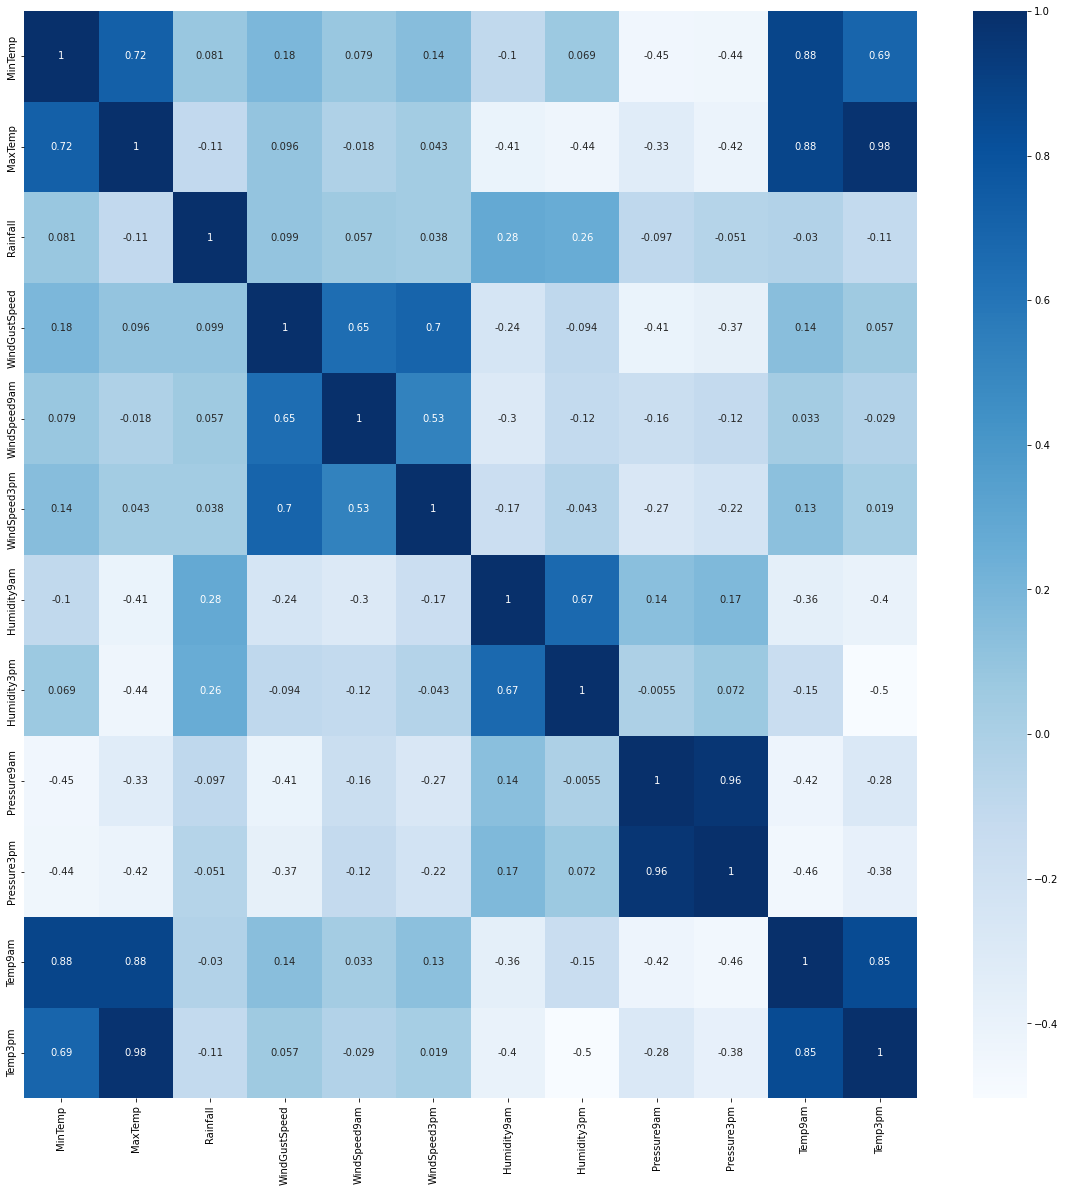

In [18]:
plt.figure(figsize=(20,20))           
sns.heatmap(dfcor,cmap='Blues',annot=True)  


# EDA

# Checking for distribution of data

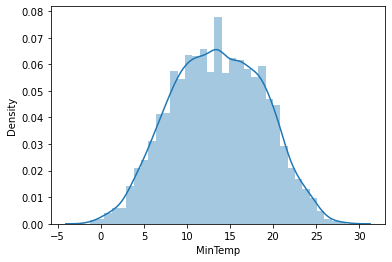

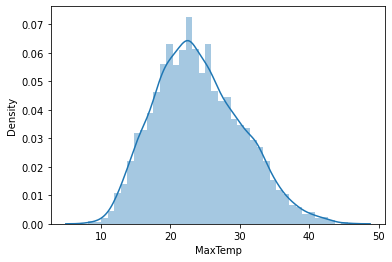

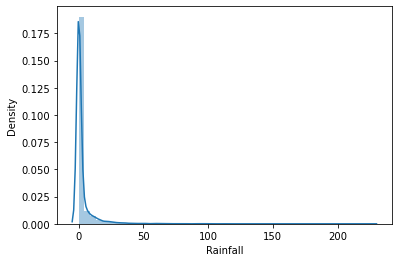

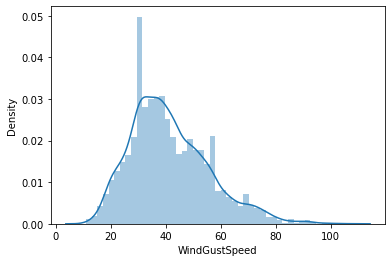

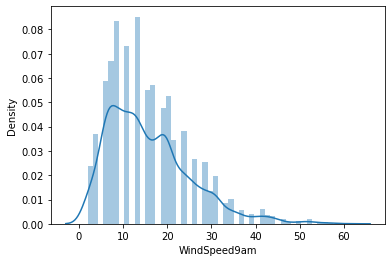

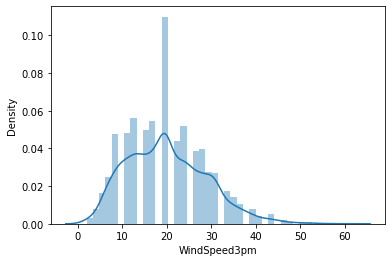

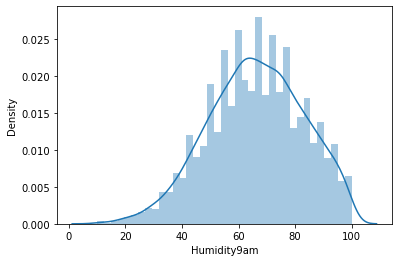

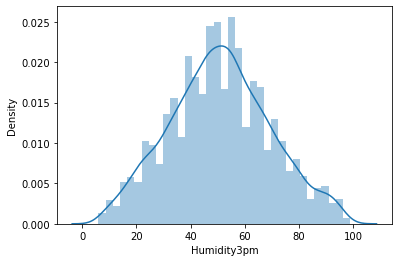

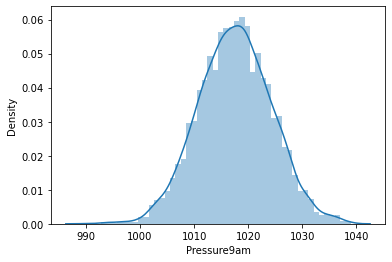

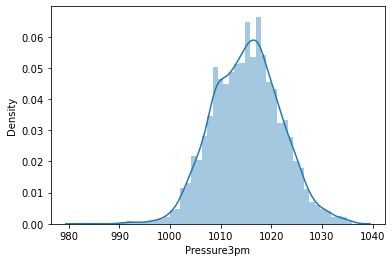

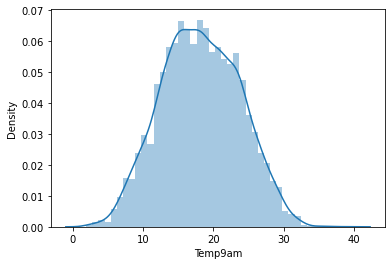

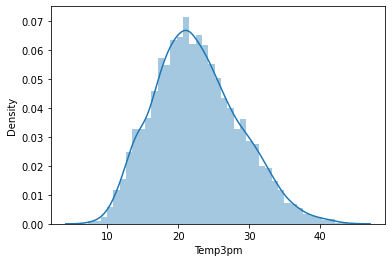

In [19]:
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

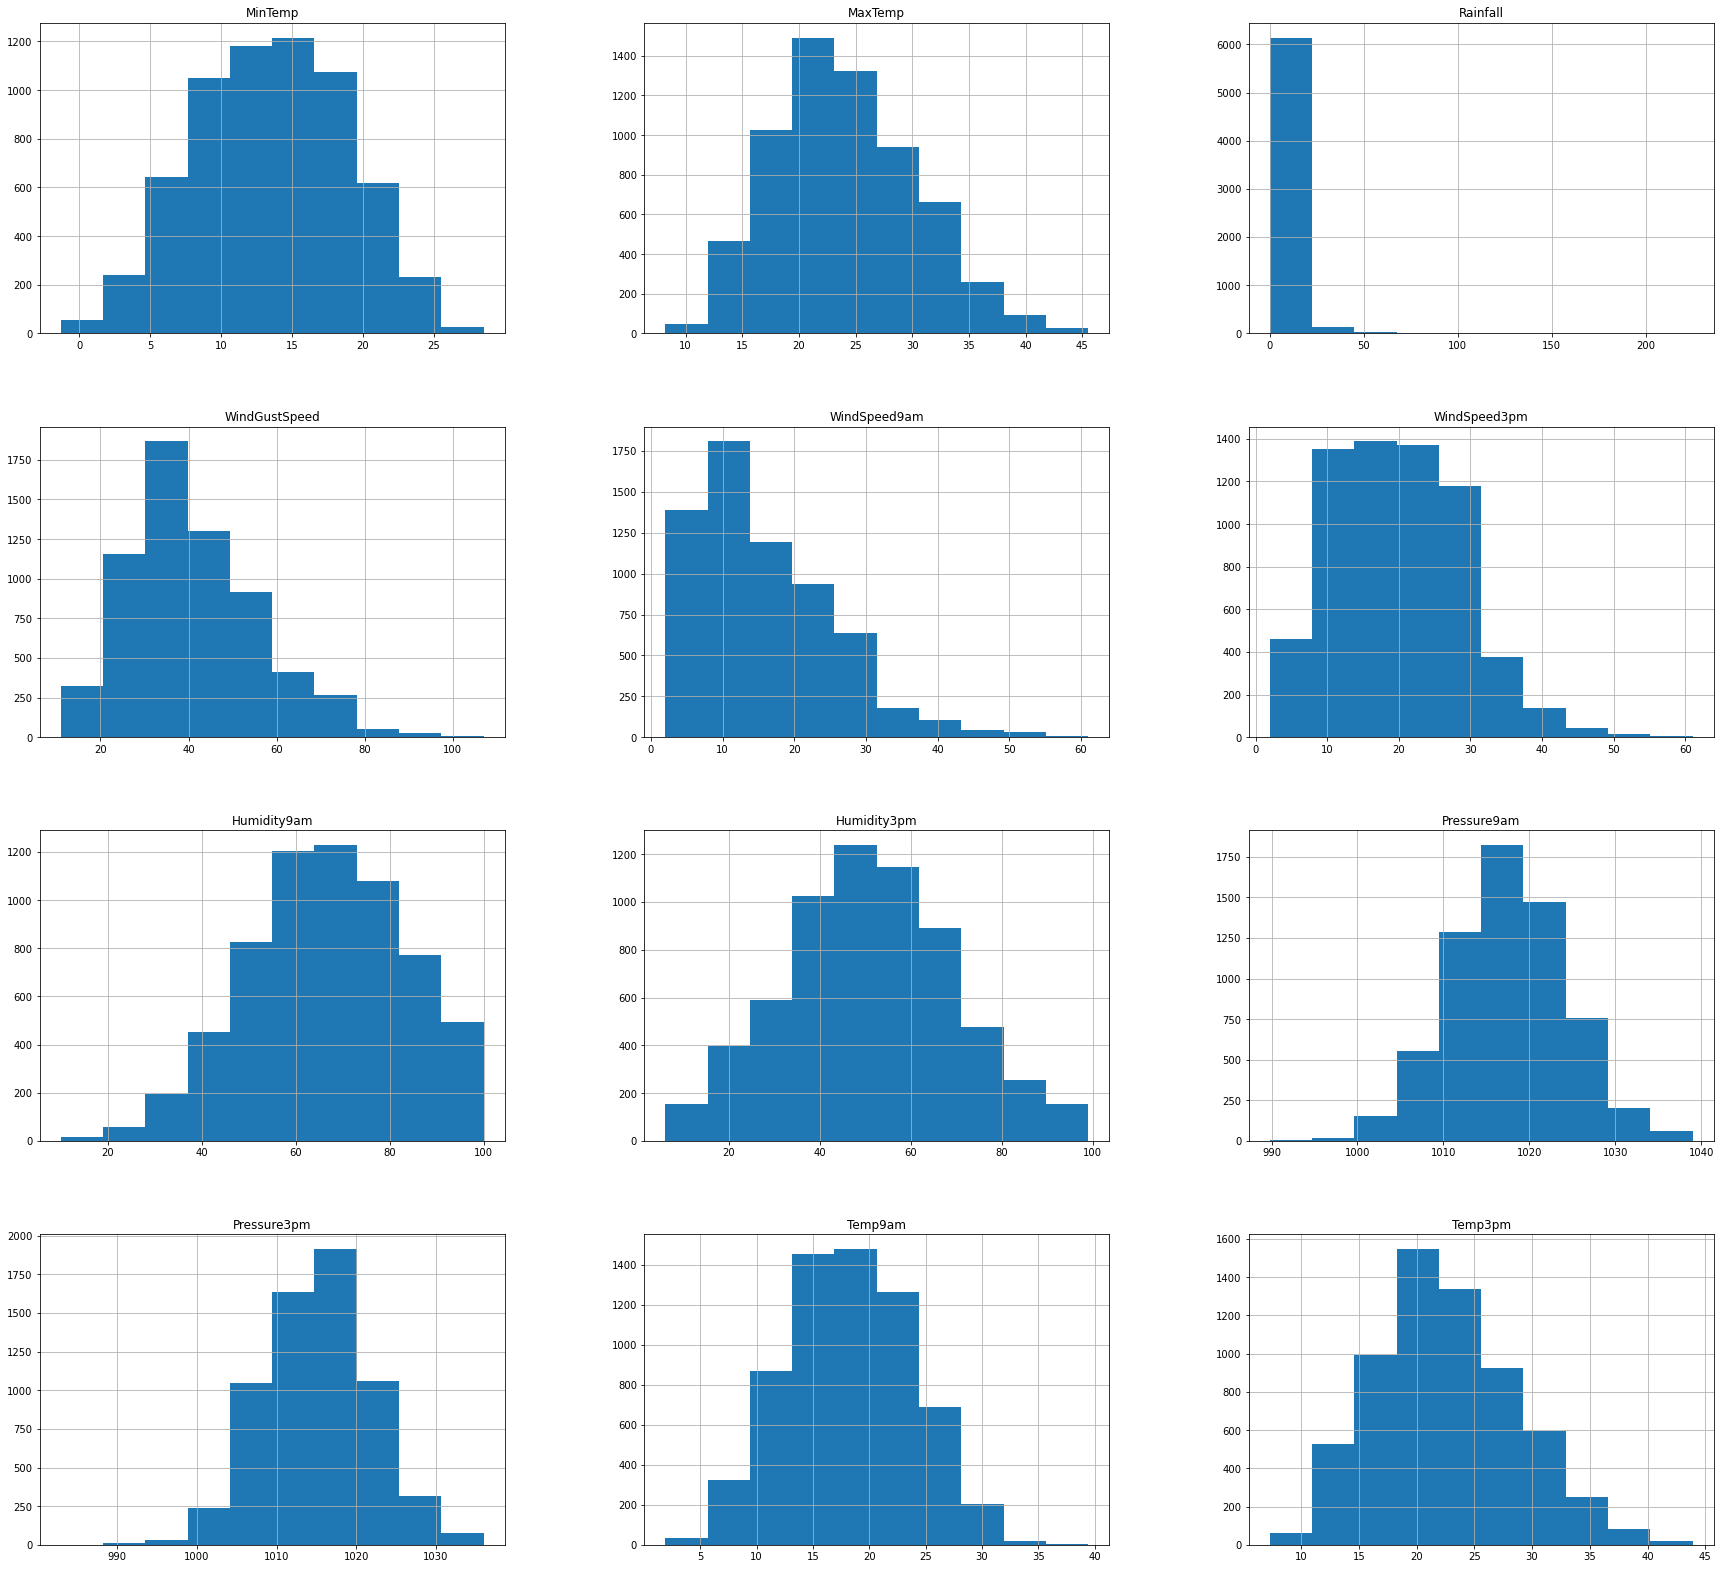

In [29]:
df.hist(figsize=(30,28));

In [30]:
df.skew()

MinTemp         -0.027584
MaxTemp          0.355414
Rainfall         9.245988
WindGustSpeed    0.760239
WindSpeed9am     1.047535
WindSpeed3pm     0.505636
Humidity9am     -0.209426
Humidity3pm      0.089337
Pressure9am     -0.014362
Pressure3pm      0.004238
Temp9am          0.033470
Temp3pm          0.369079
dtype: float64

In [ ]:
Observation : Skewness is present in Rainfall attributes.

<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

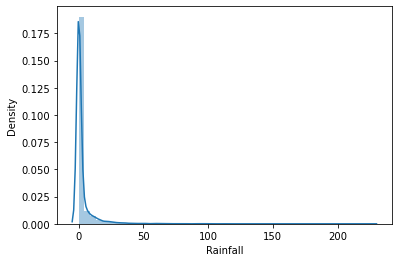

In [32]:
sns.distplot(df['Rainfall'])

<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

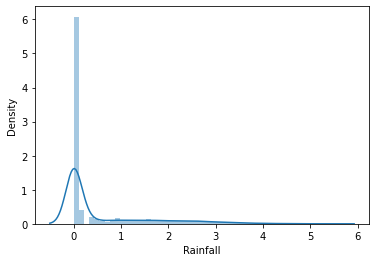

In [33]:
## skewness removal
df['Rainfall'] = np.log(df['Rainfall']+1)
sns.distplot(df["Rainfall"])

In [34]:
df.skew()

MinTemp         -0.027584
MaxTemp          0.355414
Rainfall         1.869705
WindGustSpeed    0.760239
WindSpeed9am     1.047535
WindSpeed3pm     0.505636
Humidity9am     -0.209426
Humidity3pm      0.089337
Pressure9am     -0.014362
Pressure3pm      0.004238
Temp9am          0.033470
Temp3pm          0.369079
dtype: float64

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

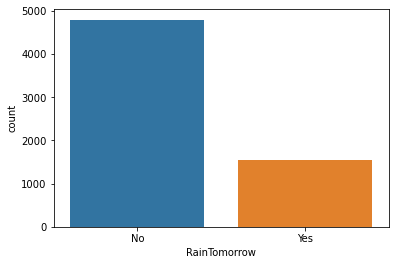

In [20]:
sns.countplot(df['RainTomorrow'])

Observation : Data is unbalanced it needs to be balanced.

<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

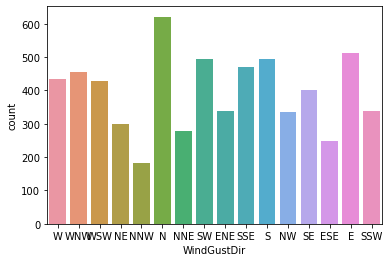

In [21]:
sns.countplot(df['WindGustDir'])

In [22]:
df.WindGustDir.value_counts()

N      621
E      511
SW     495
S      495
SSE    470
WNW    454
W      435
WSW    427
SE     401
ENE    339
SSW    338
NW     336
NE     300
NNE    279
ESE    249
NNW    182
Name: WindGustDir, dtype: int64

observation : North direction of the strongest wind gust in the 24 hours to midnight is the highest.

<AxesSubplot:xlabel='WindDir9am', ylabel='count'>

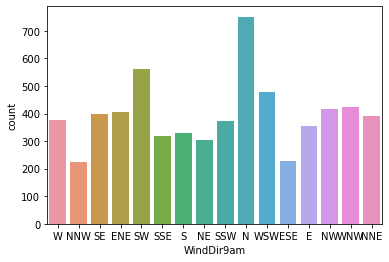

In [23]:
sns.countplot(df['WindDir9am'])

In [24]:
df.WindDir9am.value_counts()

N      751
SW     560
WSW    479
WNW    424
NW     416
ENE    407
SE     397
NNE    391
W      376
SSW    373
E      356
S      330
SSE    317
NE     303
ESE    227
NNW    225
Name: WindDir9am, dtype: int64

Observation :Higher wind can be seen in North and South-west direction

<AxesSubplot:xlabel='WindDir3pm', ylabel='count'>

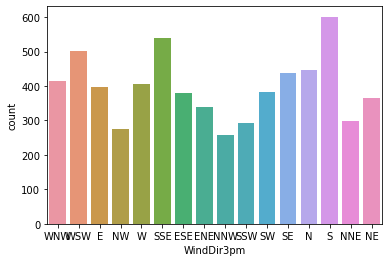

In [25]:
sns.countplot(df['WindDir3pm'])

In [26]:
df.WindDir3pm.value_counts()

S      601
SSE    540
WSW    501
N      447
SE     437
WNW    413
W      405
E      397
SW     382
ESE    381
NE     366
ENE    339
NNE    297
SSW    292
NW     275
NNW    259
Name: WindDir3pm, dtype: int64

Observation :Higher wind can be seen in and South direction

# Label Encoder

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

In [36]:
df

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.470004,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.000000,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.000000,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.000000,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,0.693147,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,3.5,21.8,0.000000,0,31.0,2,0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0,0
8420,2.8,23.4,0.000000,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0
8421,3.6,25.3,0.000000,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0
8422,5.4,26.9,0.000000,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,0


# Box plot for outliers

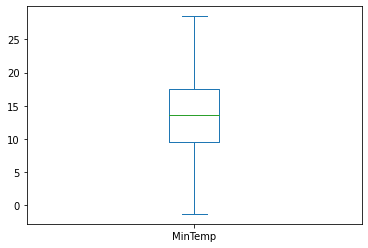

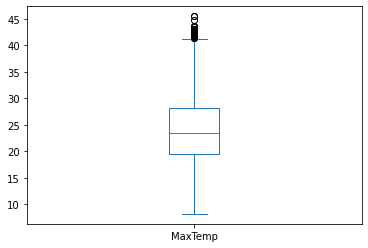

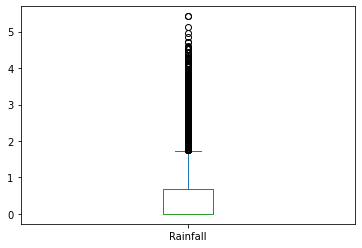

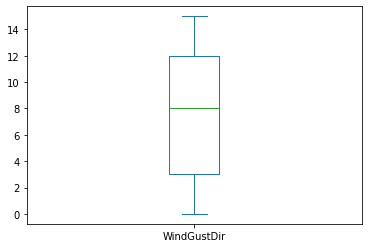

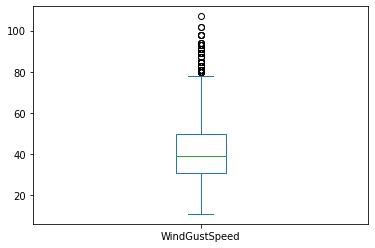

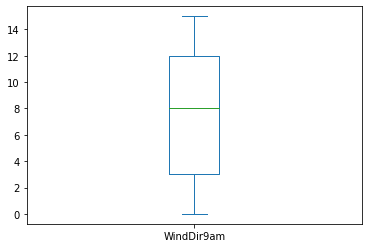

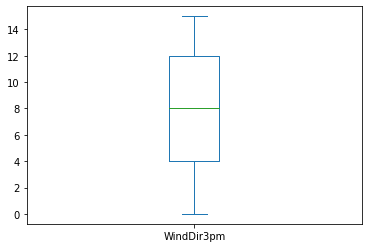

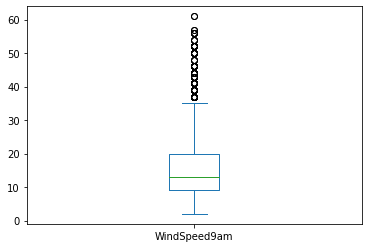

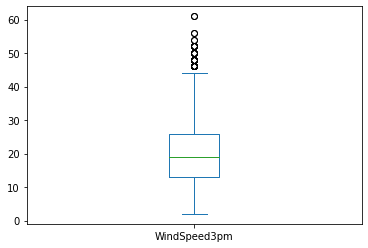

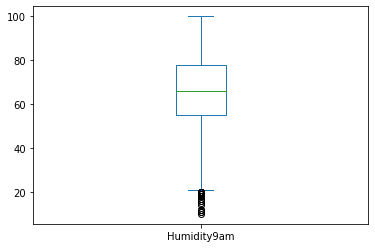

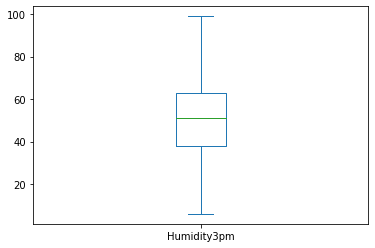

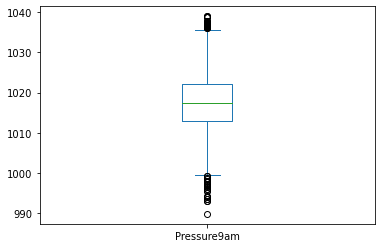

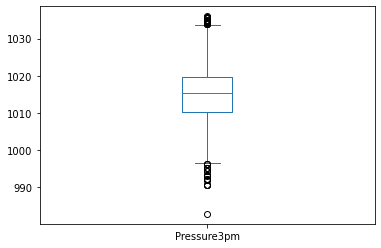

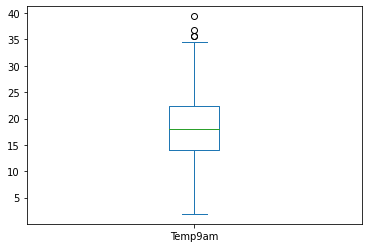

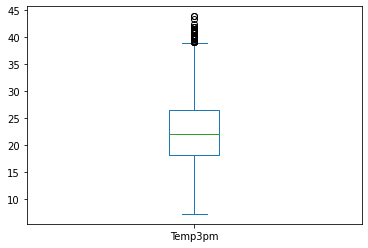

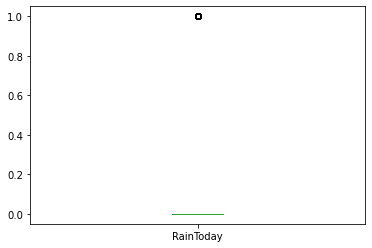

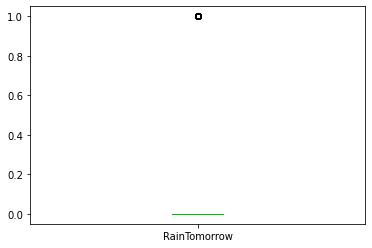

In [37]:
for i in df.describe().columns:
    df[i].plot.box()
    plt.show()

MinTemp             AxesSubplot(0.125,0.787927;0.133621x0.0920732)
MaxTemp          AxesSubplot(0.285345,0.787927;0.133621x0.0920732)
Rainfall          AxesSubplot(0.44569,0.787927;0.133621x0.0920732)
WindGustDir      AxesSubplot(0.606034,0.787927;0.133621x0.0920732)
WindGustSpeed    AxesSubplot(0.766379,0.787927;0.133621x0.0920732)
WindDir9am          AxesSubplot(0.125,0.677439;0.133621x0.0920732)
WindDir3pm       AxesSubplot(0.285345,0.677439;0.133621x0.0920732)
WindSpeed9am      AxesSubplot(0.44569,0.677439;0.133621x0.0920732)
WindSpeed3pm     AxesSubplot(0.606034,0.677439;0.133621x0.0920732)
Humidity9am      AxesSubplot(0.766379,0.677439;0.133621x0.0920732)
Humidity3pm         AxesSubplot(0.125,0.566951;0.133621x0.0920732)
Pressure9am      AxesSubplot(0.285345,0.566951;0.133621x0.0920732)
Pressure3pm       AxesSubplot(0.44569,0.566951;0.133621x0.0920732)
Temp9am          AxesSubplot(0.606034,0.566951;0.133621x0.0920732)
Temp3pm          AxesSubplot(0.766379,0.566951;0.133621x0.0920

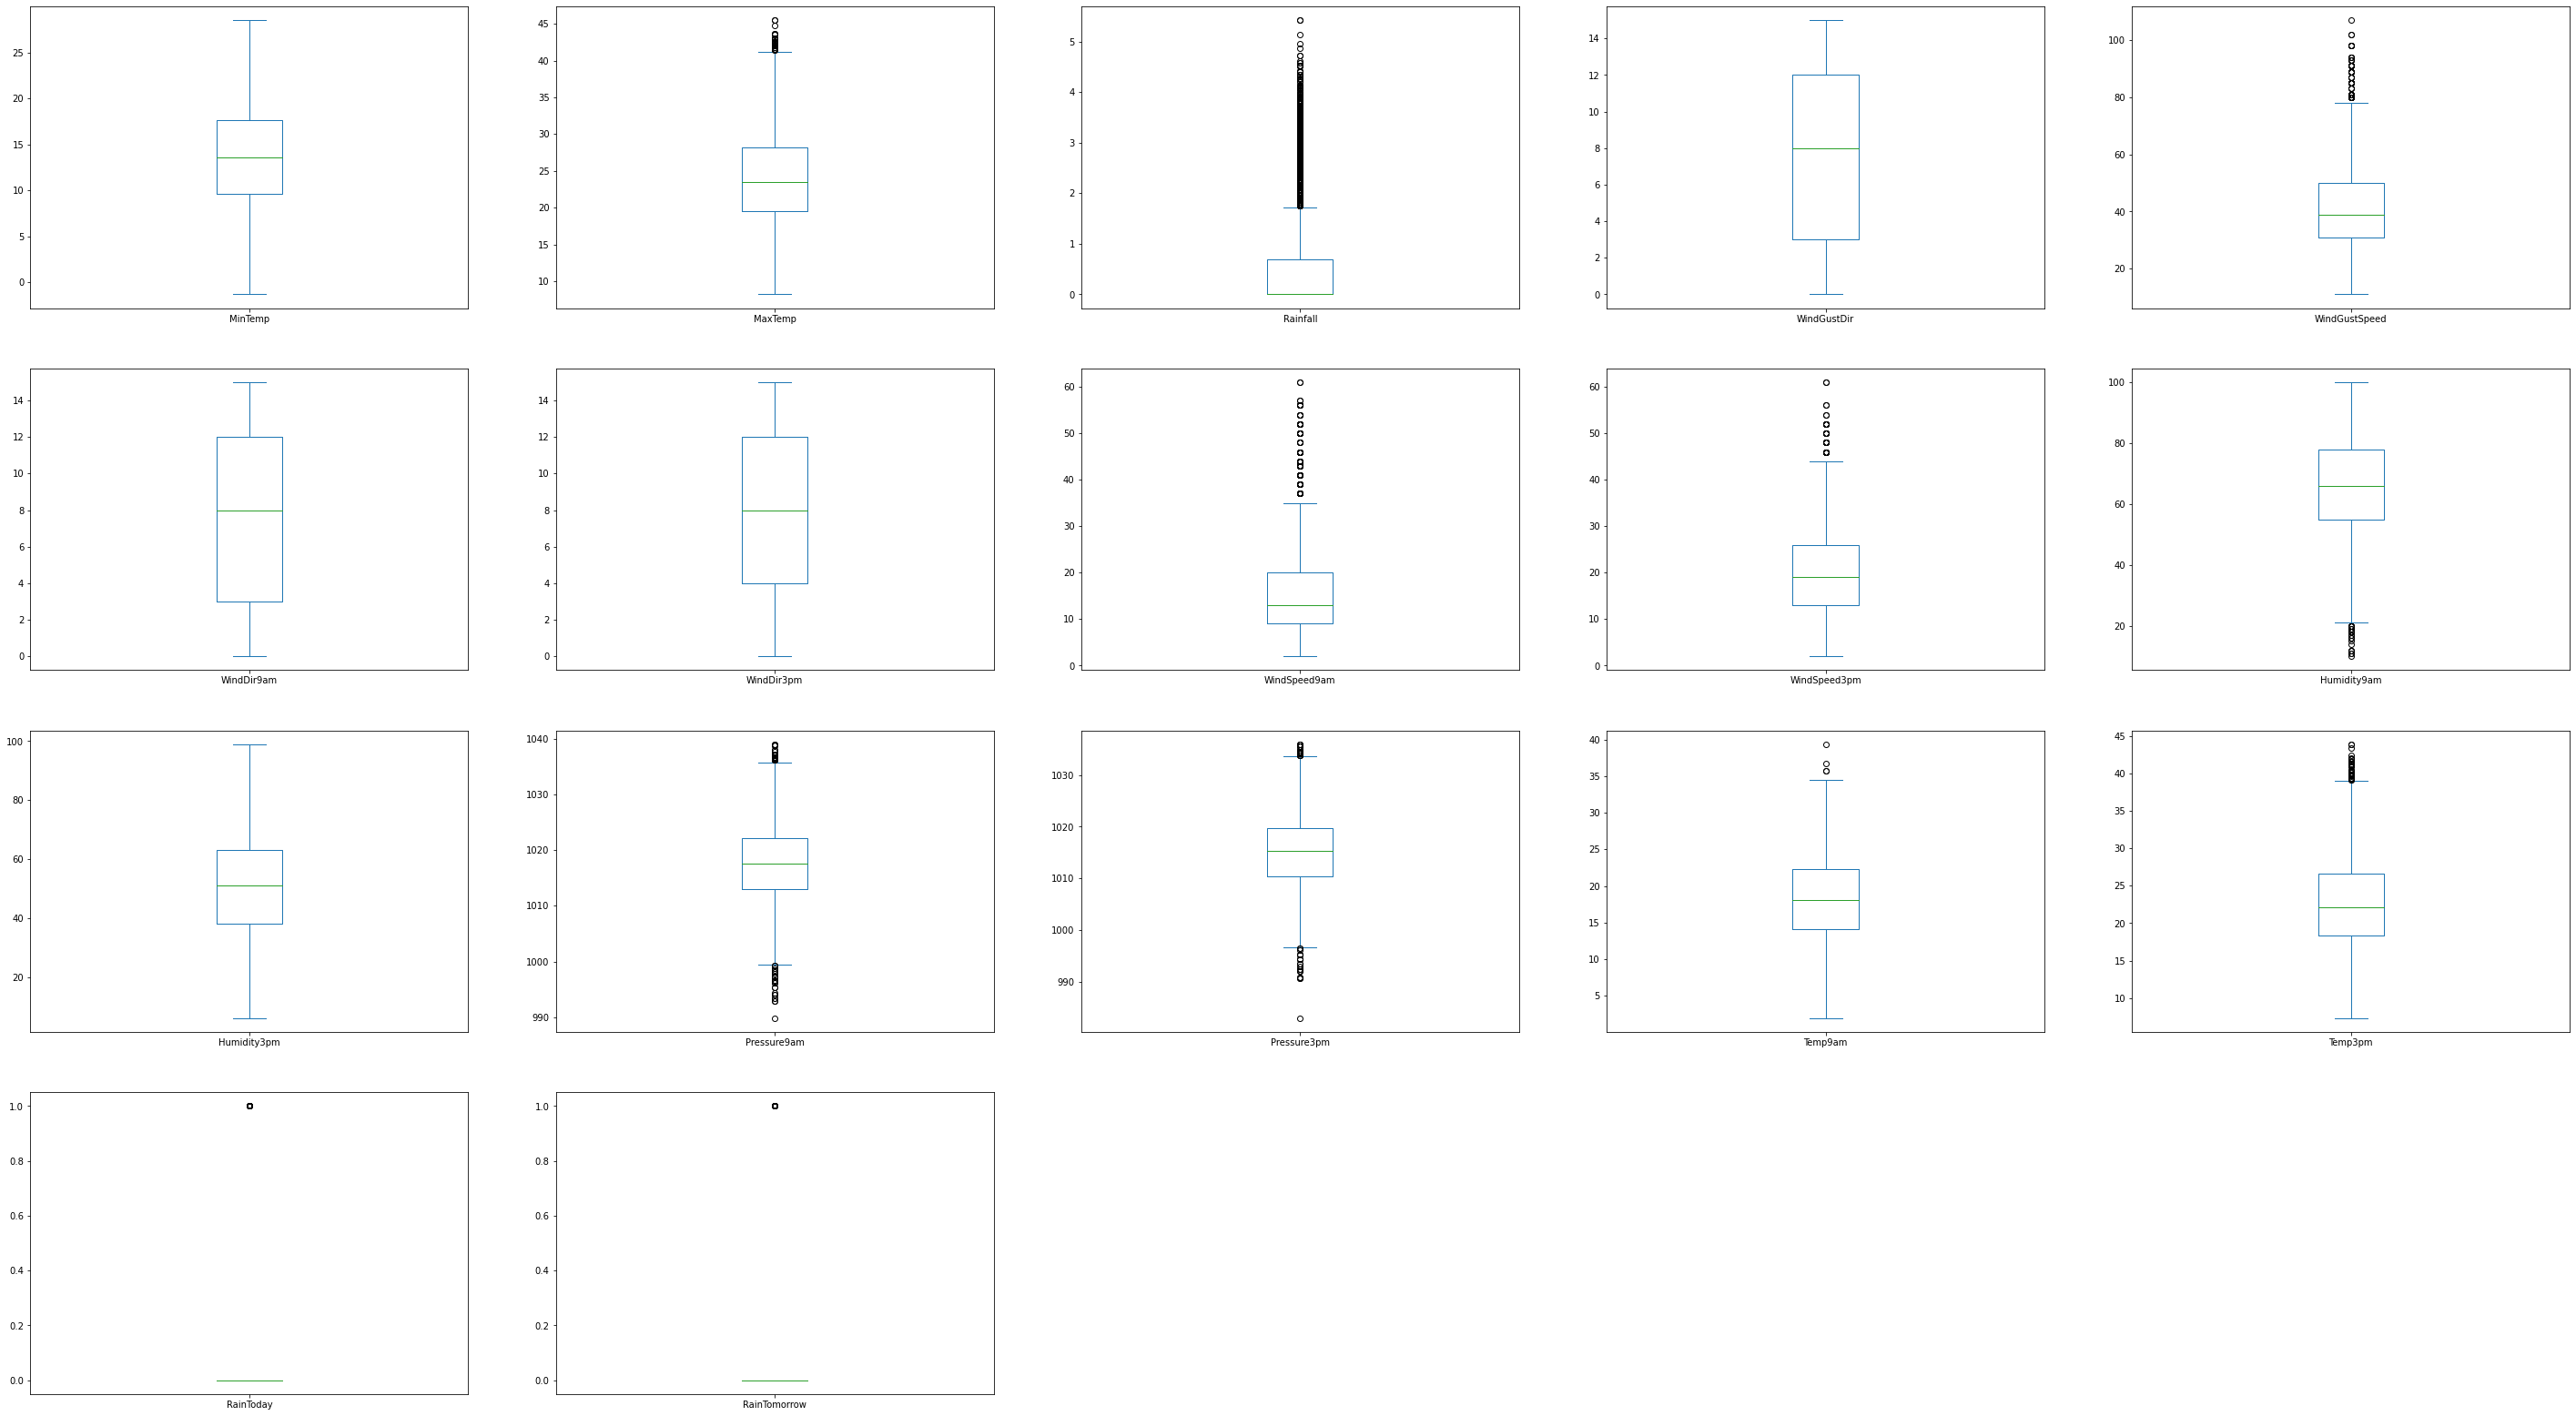

In [38]:
df.plot(kind='box',subplots=True,layout=(7,5),
        figsize=(50,50))

Observation : Outliers are present so it needs to be removed.

# Removing outliers by zscore

In [39]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.025750,0.186105,0.065537,1.103779,0.189791,1.123472,1.331828,0.433454,0.447695,0.292261,1.555986,1.450987,1.199331,0.228535,0.133048,0.570299,0.565921
1,1.156848,0.167533,0.548924,1.314079,0.189791,0.360430,1.546526,1.257241,0.223830,1.321995,1.394830,1.023432,1.095002,0.174727,0.280037,0.570299,0.565921
2,0.120008,0.263980,0.548924,1.524380,0.329749,1.123472,1.546526,0.327786,0.671560,1.680718,1.126236,1.465730,0.960864,0.506835,0.098279,0.570299,0.565921
3,0.817518,0.633692,0.548924,0.788926,1.209795,0.275528,1.673948,0.517562,1.231293,1.262207,1.878299,0.008596,0.349790,0.013305,0.643552,0.570299,0.565921
4,0.747167,1.324894,0.163961,1.103779,0.020147,1.420360,0.171060,0.940235,0.000035,0.949920,0.965080,0.993946,1.363278,0.067112,1.172301,0.570299,0.565921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,1.892061,0.362924,0.548924,1.630128,0.719940,1.208374,1.673948,0.094888,0.783563,0.425186,1.287393,1.055368,0.902165,1.573723,0.281759,0.570299,0.565921
8420,2.024023,0.105733,0.548924,1.630128,0.719940,0.275528,1.459250,0.306225,1.007428,0.903484,1.448549,1.040625,0.768027,1.448172,0.033908,0.570299,0.565921
8421,1.873210,0.199682,0.548924,0.368325,1.349754,0.275528,1.029853,0.306225,1.231293,0.604548,1.609705,0.878449,0.589176,1.304685,0.313084,0.570299,0.565921
8422,1.533880,0.456873,0.548924,0.999226,0.300064,0.275528,1.331828,0.728898,1.231293,0.783910,1.448549,0.509867,0.246379,1.017712,0.577458,0.570299,0.565921


In [40]:
threshold=3
print(np.where(z>3))

(array([  12,   12,   41,   41,   49,   49,   57,   57,   58,   59,   59,
         62,   63,   63,  104,  200,  305,  305,  327,  328,  329,  351,
        368,  431,  522,  522,  523,  536,  550,  585,  605,  628,  629,
        634,  726,  739,  768,  769,  769,  769,  790,  791,  793,  913,
        957,  958,  992,  996, 1019, 1020, 1110, 1111, 1164, 1165, 1166,
       1225, 1226, 1227, 1258, 1259, 1279, 1288, 1319, 1326, 1328, 1335,
       1423, 1468, 1476, 1476, 1483, 1484, 1484, 1484, 1485, 1487, 1499,
       1499, 1499, 1506, 1506, 1516, 1516, 1636, 1647, 1658, 1658, 1676,
       1702, 1713, 1767, 1769, 1778, 1794, 1794, 1794, 1794, 1795, 1795,
       1803, 1816, 1836, 1858, 1899, 1911, 1942, 1943, 1947, 1954, 1958,
       2024, 2033, 2064, 2071, 2073, 2080, 2168, 2213, 2221, 2221, 2228,
       2229, 2229, 2229, 2230, 2232, 2244, 2244, 2244, 2251, 2251, 2261,
       2261, 2381, 2392, 2403, 2403, 2421, 2447, 2458, 2512, 2514, 2523,
       2539, 2539, 2539, 2539, 2540, 2540, 2548, 2

In [41]:
z.iloc[12,11]

3.426584147163376

In [42]:
df1=df[(z<3).all(axis=1)]

In [43]:
df1

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.470004,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.000000,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.000000,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.000000,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,0.693147,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,3.5,21.8,0.000000,0,31.0,2,0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0,0
8420,2.8,23.4,0.000000,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0
8421,3.6,25.3,0.000000,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0
8422,5.4,26.9,0.000000,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,0


In [44]:
X = df.drop(['RainTomorrow'], axis = 1)
Y = df['RainTomorrow']

# Standard scaler method

In [45]:
from sklearn.preprocessing import StandardScaler
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

# Balancing the data

In [46]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.74 %
1    24.26 %
Name: RainTomorrow, dtype: object

In [47]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [48]:
ros.fit(X, Y)

RandomOverSampler(random_state=42)

In [49]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [53]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
Name: RainTomorrow, dtype: object

In [51]:
## now target data is balanced.

# Loading ML algorithm

In [52]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Train_Test_split and Best Random state

In [54]:
maxAccu=0  ## maximum accuracy
maxRS=0   ## best random state value for which max accuracy is achieved

for i in range(1,200):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(X_train,Y_train)   ## fitting the data will train your model
    predrf=LR.predict(X_test)   ## this is the predicted target variable
    acc=accuracy_score(Y_test,predrf)  ## accuracy score
    print('accuracy',acc,'random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
        ## print('accuracy',maxAccu, 'random_state' i)

accuracy 0.8421468034727704 random_state 1
accuracy 0.8255722178374112 random_state 2
accuracy 0.824782951854775 random_state 3
accuracy 0.8397790055248618 random_state 4
accuracy 0.8279400157853196 random_state 5
accuracy 0.8389897395422258 random_state 6
accuracy 0.8366219415943172 random_state 7
accuracy 0.8524072612470402 random_state 8
accuracy 0.840568271507498 random_state 9
accuracy 0.8437253354380426 random_state 10
accuracy 0.8413575374901342 random_state 11
accuracy 0.840568271507498 random_state 12
accuracy 0.829518547750592 random_state 13
accuracy 0.8445146014206788 random_state 14
accuracy 0.846093133385951 random_state 15
accuracy 0.8326756116811366 random_state 16
accuracy 0.8413575374901342 random_state 17
accuracy 0.824782951854775 random_state 18
accuracy 0.8271507498026835 random_state 19
accuracy 0.8389897395422258 random_state 20
accuracy 0.8374112075769534 random_state 21
accuracy 0.8397790055248618 random_state 22
accuracy 0.8389897395422258 random_state 23
acc

In [55]:
print("Best accuracy is ", maxAccu," on Random_state",maxRS)

Best accuracy is  0.8626677190213102  on Random_state 102


In [56]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=102)

In [57]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,Y_train) 
predlr=LR.predict(X_test)
print("--------------Result of LogisticRegression---------------------")
print("Accuracy",accuracy_score(Y_test,predlr)*100)
print(confusion_matrix(Y_test,predlr))
print(classification_report(Y_test,predlr))

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train) 
preddt=dt.predict(X_test)
print("--------------Result of DecisionTreeClassifier---------------------")
print("Accuracy",accuracy_score(Y_test,preddt)*100)
print(confusion_matrix(Y_test,preddt))
print(classification_report(Y_test,preddt))

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train) 
predrf=rf.predict(X_test)
print("--------------Result of RandomForestClassifier---------------------")
print("Accuracy",accuracy_score(Y_test,predrf)*100)
print(confusion_matrix(Y_test,predrf))
print(classification_report(Y_test,predrf))


from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,Y_train) 
predsvc=svc.predict(X_test)
print("--------------Result of SVC---------------------")
print("Accuracy",accuracy_score(Y_test,predsvc)*100)
print(confusion_matrix(Y_test,predsvc))
print(classification_report(Y_test,predsvc))

from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier()
KN.fit(X_train,Y_train) 
predKN=svc.predict(X_test)
print("--------------Result of KNeighborsClassifier---------------------")
print("Accuracy",accuracy_score(Y_test,predKN)*100)
print(confusion_matrix(Y_test,predKN))
print(classification_report(Y_test,predKN))

from sklearn.naive_bayes import GaussianNB
GNB=KNeighborsClassifier()
GNB.fit(X_train,Y_train) 
predGNB=svc.predict(X_test)
print("--------------Result of GaussianNB---------------------")
print("Accuracy",accuracy_score(Y_test,predGNB)*100)
print(confusion_matrix(Y_test,predGNB))
print(classification_report(Y_test,predGNB))


--------------Result of LogisticRegression---------------------
Accuracy 86.26677190213103
[[938  63]
 [111 155]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1001
           1       0.71      0.58      0.64       266

    accuracy                           0.86      1267
   macro avg       0.80      0.76      0.78      1267
weighted avg       0.86      0.86      0.86      1267

--------------Result of DecisionTreeClassifier---------------------
Accuracy 87.60852407261247
[[903  98]
 [ 59 207]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1001
           1       0.68      0.78      0.73       266

    accuracy                           0.88      1267
   macro avg       0.81      0.84      0.82      1267
weighted avg       0.88      0.88      0.88      1267

--------------Result of RandomForestClassifier---------------------
Accuracy 93.52801894238358
[[982  19]
 [ 63 20

# Cross Validation

In [58]:
from sklearn.model_selection import cross_val_score

scr1=cross_val_score(LR,X,Y,cv=5)
scr2=cross_val_score(dt,X,Y,cv=5)
scr3=cross_val_score(rf,X,Y,cv=5)
scr4=cross_val_score(svc,X,Y,cv=5)
scr5=cross_val_score(KN,X,Y,cv=5)
scr6=cross_val_score(GNB,X,Y,cv=5)


print("Cross Validation score of Logistic Regresssion model : ",scr1.mean())
print("Cross Validation score of Decision Tree Classifier : ",scr2.mean())
print("Cross Validation score of Random Forest Classifier : ",scr3.mean())
print("Cross Validation score of SVC : ",scr4.mean())
print("Cross Validation score of KNeighbors classifier : ",scr5.mean())
print("Cross Validation score of GaussianNB : ",scr6.mean())

Cross Validation score of Logistic Regresssion model :  0.8291289022220394
Cross Validation score of Decision Tree Classifier :  0.8065556457455072
Cross Validation score of Random Forest Classifier :  0.8812507559123255
Cross Validation score of SVC :  0.8386012161927955
Cross Validation score of KNeighbors classifier :  0.8194926254128683
Cross Validation score of GaussianNB :  0.8194926254128683


# Hyperparameter Tunning with GridSearchCV

In [59]:
RandomForestClassifier()

RandomForestClassifier()

In [60]:
from sklearn.model_selection import GridSearchCV

## creating parameter list to pass in GridSearchCv

parameters= {'max_features':['auto','sqrt','log2'],
            'max_depth':[9,11,13,15,17],
            'criterion':['gini','entropy']}

In [61]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(X_train,Y_train)  ## fitiing the data in model
GCV.best_params_   ## Printing the best parameter found by GridSearchCV

{'criterion': 'gini', 'max_depth': 17, 'max_features': 'sqrt'}

In [62]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [63]:
GCV.best_estimator_

RandomForestClassifier(max_depth=17)

In [64]:
GCV_pred=GCV.best_estimator_.predict(X_test)   ## predicting with best parameters
accuracy_score(Y_test,GCV_pred) ## Checking final accuracy

0.9321231254932912

# AUC_ROC CURVE

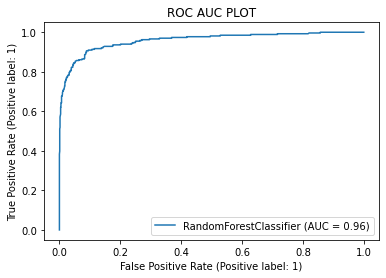

In [65]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,X_test,Y_test)
plt.title("ROC AUC PLOT")
plt.show()

# AdaBoostClassifier

In [66]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(X_train,Y_train) 
predad=ad.predict(X_test)
print("Accuracy",accuracy_score(Y_test,predad)*100)
print(confusion_matrix(Y_test,predad))
print(classification_report(Y_test,predad))

Accuracy 86.42462509865825
[[933  68]
 [104 162]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1001
           1       0.70      0.61      0.65       266

    accuracy                           0.86      1267
   macro avg       0.80      0.77      0.78      1267
weighted avg       0.86      0.86      0.86      1267



# Cross validation with AdaBoost

In [68]:
scr7=cross_val_score(ad,X,Y,cv=5)
print("Cross Validation score of AdaBoostClassifier : ",scr7.mean())

Cross Validation score of AdaBoostClassifier :  0.8253399267591094


In [70]:
ad=AdaBoostClassifier(n_estimators=200
                     )
ad.fit(X_train,Y_train) 
predad=ad.predict(X_test)
print("Accuracy",accuracy_score(Y_test,predad)*100)
print(confusion_matrix(Y_test,predad))
print(classification_report(Y_test,predad))

Accuracy 86.74033149171271
[[937  64]
 [104 162]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1001
           1       0.72      0.61      0.66       266

    accuracy                           0.87      1267
   macro avg       0.81      0.77      0.79      1267
weighted avg       0.86      0.87      0.86      1267



# AdaBoost Classifier with Support Vector Classifier

In [72]:
from sklearn.svm import SVC
svc=SVC()

ad=AdaBoostClassifier(n_estimators=200,base_estimator=svc,algorithm='SAMME')
ad.fit(X_train,Y_train) 
predad=ad.predict(X_test)
print("Accuracy",accuracy_score(Y_test,predad)*100)
print(confusion_matrix(Y_test,predad))
print(classification_report(Y_test,predad))

Accuracy 79.00552486187846
[[1001    0]
 [ 266    0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1001
           1       0.00      0.00      0.00       266

    accuracy                           0.79      1267
   macro avg       0.40      0.50      0.44      1267
weighted avg       0.62      0.79      0.70      1267



# Conclusion

From above analysis, some modeles gives same result such as Logistic Regresssion,Random Forest Classifier,SVC,KNeighbors classifier,GaussianNB,AdaBoostClassifier.

By hyperperameter tunning RandomForestClassifier gives the best value for this dataset.

# Saving the model in pickle format

In [73]:
## PICKeling of file or serialization of a file

import joblib
joblib.dump(GCV.best_estimator_,"weatherAUS.pkl")

['weatherAUS.pkl']